## Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

### The aim is to build a predictive model and find out the sales of each product at a particular store.

The dataset includes two files:

- bigdatamart_Train.csv: We can use this file for the model building purpose. 

- bigdatamart_Test.csv: We can use this file for getting predictions from the trained model.

In [27]:
#Loading the data
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)

#Loading the train data
data = pd.read_csv('bigdatamart_Train.csv')
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [28]:
data.shape

(8523, 12)

We have 8523 rows and 12 columns in this train dataset.

In [29]:
#Loading the test dataset

test_data = pd.read_csv('bigdatamart_Test.csv')
test_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [30]:
test_data.shape

(5681, 11)

We have 5681 rows and 11 columns(excluding the target columns) in the test data.

In [31]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [32]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Type of data in each columns

In [33]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- The columns ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'] are having float type of data.
- The column 'Outlet_Establishment_Year' is having integer values.
- The columns ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'] are having string values. We can check the nature of data in these columns in later steps.

### Features in the Dataset(Independent Variables)

#### The following columns are the independent variables in the dataset.

1. Item_Identifier - It is the identification alpha numeric code for identifying each items that the mart is selling. 
2. Item_Weight - Specifies the actual weight of item. 
3. Item_Fat_Content - It is the level of fat containing in each type of items.
4. Item_Visibility - It is the measure of visibility of the item. 
5. Item_Type - It specifies the type of the item.
6. Item_MRP - Specifies the Max. Retail Price of the item. 
7. Outlet_Identifier - It is the unique alpha numeric value provided to identify the store which the product is sold.
8. Outlet_Establishment_Year - Specifies the data when the outlet was established.
9. Outlet_Size - Specifies the size of the outlet.
10. Outlet_Location_Type - Specifies the type of location of the outlet.(Eg:Tier 1, Tier 2, Tier 3).
11. Outlet_Type - Its the type of the outlet according to various factors like, size, location, type of items sold etc.

### Target(Dependent Variable)

Item_Outlet_Sales - It specifies the sale of items from the specific outlet or supermarket. Since the values are float type, we can treat this as a regression model.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The columns in the data are having string, integer and float values and there are null values present in the columns ['Item_Weight','Outlet_Size']

### Exploring data variables(dtype - Object)

In [35]:
#User defined function to print the count of each uniaue values in each columns in Train data.
def val_c(col):
    print(data[col].value_counts())
    

In [36]:
#User defined function to print the count of each uniaue values in each columns in Train data.
def val_c_test(col):
    print(test_data[col].value_counts())

In [37]:
val_c('Item_Identifier')

FDW13    10
FDG33    10
FDW49     9
FDF56     9
DRN47     9
         ..
FDT35     1
DRF48     1
FDK57     1
FDE52     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64


In [38]:
val_c_test('Item_Identifier')

FDZ50    8
FDP15    8
NCS41    8
FDW10    8
FDN52    8
        ..
FDJ09    1
FDO22    1
FDK58    1
FDG09    1
FDI14    1
Name: Item_Identifier, Length: 1543, dtype: int64


The values in the column are unique for each item. So we can encode the data for convenience in further processing.

In [39]:
val_c('Item_Fat_Content')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [40]:
val_c_test('Item_Fat_Content')

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


As we can see some of the values are having the same category but is been displayed in different names(Upper/lower case,short forms). So we can rename the same categorical data into one name. 

In [41]:
#Train data
data['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'], inplace = True)
data['Item_Fat_Content'].replace('reg','Regular',inplace = True)

In [42]:
#Test data
test_data['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'], inplace = True)
test_data['Item_Fat_Content'].replace('reg','Regular',inplace = True)

In [43]:
val_c('Item_Fat_Content')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [44]:
val_c_test('Item_Fat_Content')

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


We have renamed same categorical values and now we have two main categories in the column. Now it is easy to encode the categorical data.

In [45]:
val_c('Item_Type')

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [46]:
val_c_test('Item_Type')

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64


In the column 'Item_Type', there is no same categorical data which are mentioned in different names. Also it is possible to encode the data in the column for convenience in further processing.

In [47]:
val_c('Outlet_Identifier')

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [48]:
val_c_test('Outlet_Identifier')

OUT027    624
OUT013    621
OUT049    620
OUT035    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64


We only have limited categories in the column data. So it is easy for us to encode the data for convenience in further processing.

In [49]:
val_c('Outlet_Size')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [50]:
val_c_test('Outlet_Size')

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


We only have few categories in this columns. 

In [51]:
val_c('Outlet_Location_Type')

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [52]:
val_c_test('Outlet_Location_Type')

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64


In the column 'Outlet_Location_Type' we only have 3 categories. So we can encode the data for convenience in further processing.

In [53]:
val_c('Outlet_Type')

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [54]:
val_c_test('Outlet_Type')

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64


In the column 'Outlet_Type' we only have 4 categories. So we can encode the data for convenience in further processing.

### Checking for Missing Values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


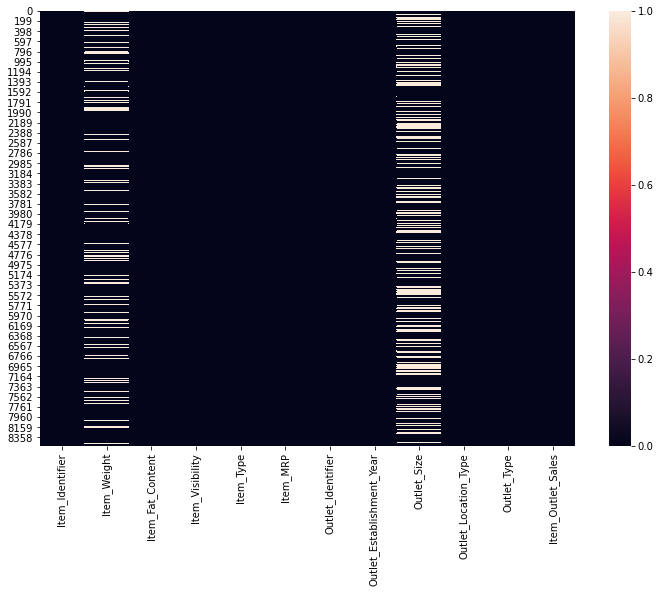

In [55]:
#Train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


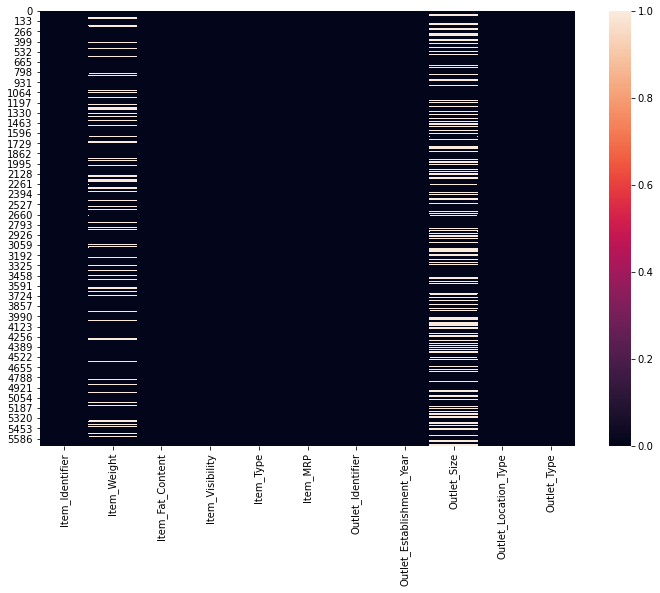

In [56]:
#Test data
plt.figure(figsize = [12,8])
sns.heatmap(test_data.isnull())
print(test_data.isnull().sum())

There are missing data in columns ['Item_Weight','Outlet_Size'] for both train and test datasets.

1.  Train data - Missing values
- Item_Weight - 1463
- Outlet_Size - 2410

2. Test data - Missing values
- Item_Weight - 976
- Outlet_Size - 1606

* Here the column 'Item_Weight' is having numerical values, so we can replace the null values with the mean of the total of the columns.
* The column 'Outlet_Size' is having categorical values, so we can replace the null values with the mode of the values(most occurred value).

In [57]:
#Replacing the missing values in train data.
import scipy.stats as st
import numpy as np
data['Item_Weight'].fillna(np.mean(data['Item_Weight']),inplace = True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


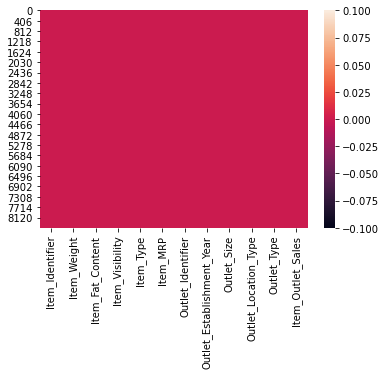

In [58]:
#Checking whether the null values are replaced with mean/mode or not.

sns.heatmap(data.isnull())
print(data.isnull().sum())

The null values from the train data has been replaced with mean/mode.

In [59]:
#Replacing the missing values in test data.

test_data['Item_Weight'].fillna(np.mean(test_data['Item_Weight']),inplace = True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


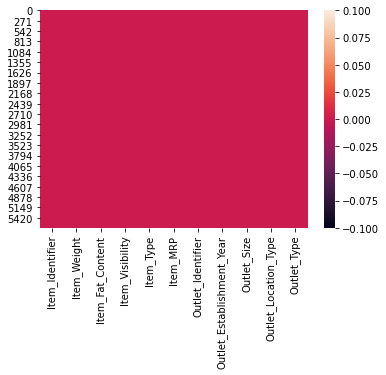

In [60]:
#Checking whether the null values are replaced with mean/mode or not.

sns.heatmap(test_data.isnull())
print(test_data.isnull().sum())

The null values from the test data has been replaced with mean/mode.

### Encoding the categorical columns

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [62]:
#Encoding columns with nominal and binary values in train data.
for i in data.loc[:,['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']].columns:
    data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [63]:
#Encoding columns with nominal and binary values in test data.
for i in test_data.loc[:,['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']].columns:
    test_data[i] = enc.fit_transform(test_data[i].values.reshape(-1,1))

#### Encoding columns with ordinal values in train data and test data

In [64]:
#Column - Outlet_Size
#train data.
oenc = OrdinalEncoder(categories=[['Small','Medium','High']])
data['Outlet_Size'] = oenc.fit_transform(data['Outlet_Size'].values.reshape(-1,1))

#test data.
test_data['Outlet_Size'] = oenc.fit_transform(test_data['Outlet_Size'].values.reshape(-1,1))

In [65]:
#Column - Outlet_Location_Type
#Train data
oenc = OrdinalEncoder(categories= [['Tier 1','Tier 2','Tier 3']])
data['Outlet_Location_Type'] = oenc.fit_transform(data['Outlet_Location_Type'].values.reshape(-1,1))

#Test data
test_data['Outlet_Location_Type'] = oenc.fit_transform(test_data['Outlet_Location_Type'].values.reshape(-1,1))

In [66]:
#Column - Outlet_Type
#Train data
oenc = OrdinalEncoder(categories= [['Grocery Store','Supermarket Type1', 'Supermarket Type2','Supermarket Type3']])
data['Outlet_Type'] = oenc.fit_transform(data['Outlet_Type'].values.reshape(-1,1))

#Test data
test_data['Outlet_Type'] = oenc.fit_transform(test_data['Outlet_Type'].values.reshape(-1,1))

In [67]:
print(data.dtypes)
data.sample(10)

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1785,1057.0,10.000000,0.0,0.025932,3.0,264.7226,3.0,2009,1.0,2.0,2.0,3171.8712
3933,337.0,19.350000,1.0,0.049594,6.0,77.0644,1.0,1987,2.0,2.0,1.0,2278.3676
541,867.0,14.300000,0.0,0.131153,0.0,78.6328,2.0,2007,1.0,1.0,1.0,231.6984
2697,184.0,16.250000,0.0,0.145913,4.0,95.4410,0.0,1998,1.0,2.0,0.0,193.0820
4014,688.0,18.250000,0.0,0.054234,13.0,142.0154,8.0,1997,0.0,0.0,1.0,2269.0464
3230,546.0,9.195000,1.0,0.122495,6.0,100.1016,9.0,1999,1.0,0.0,1.0,1416.8224
212,616.0,5.780000,1.0,0.000000,13.0,263.7568,2.0,2007,1.0,1.0,1.0,2636.5680
7921,1513.0,12.857645,0.0,0.039996,8.0,176.7686,4.0,1985,0.0,0.0,0.0,888.8430
3325,1147.0,16.200000,0.0,0.063017,3.0,100.3700,6.0,2004,0.0,1.0,1.0,998.7000
5720,847.0,17.000000,1.0,0.015990,13.0,228.8352,9.0,1999,1.0,0.0,1.0,4351.6688


In [68]:
print(test_data.dtypes)
test_data.sample(10)

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
dtype: object


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
136,783.0,16.750000,0.0,0.029861,13.0,39.5822,3.0,2009,1.0,2.0,2.0
1008,524.0,8.600000,1.0,0.040287,3.0,190.5530,7.0,2002,1.0,1.0,1.0
4125,255.0,16.000000,1.0,0.173736,13.0,156.7972,2.0,2007,1.0,1.0,1.0
702,6.0,12.300000,0.0,0.069568,14.0,106.0938,9.0,1999,1.0,0.0,1.0
353,126.0,15.200000,0.0,0.112875,14.0,37.2848,6.0,2004,0.0,1.0,1.0
557,1481.0,12.695633,0.0,0.043574,9.0,148.3392,4.0,1985,0.0,0.0,0.0
1544,287.0,12.695633,0.0,0.036268,6.0,122.5046,4.0,1985,0.0,0.0,0.0
3032,685.0,21.100000,1.0,0.020836,2.0,129.7994,2.0,2007,1.0,1.0,1.0
1233,29.0,12.695633,0.0,0.048508,14.0,86.1198,4.0,1985,0.0,0.0,0.0
4095,725.0,5.150000,1.0,0.061426,10.0,122.7388,3.0,2009,1.0,2.0,2.0


### Statistical Summary

### Describe of the data

In [69]:
data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,0.829168,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

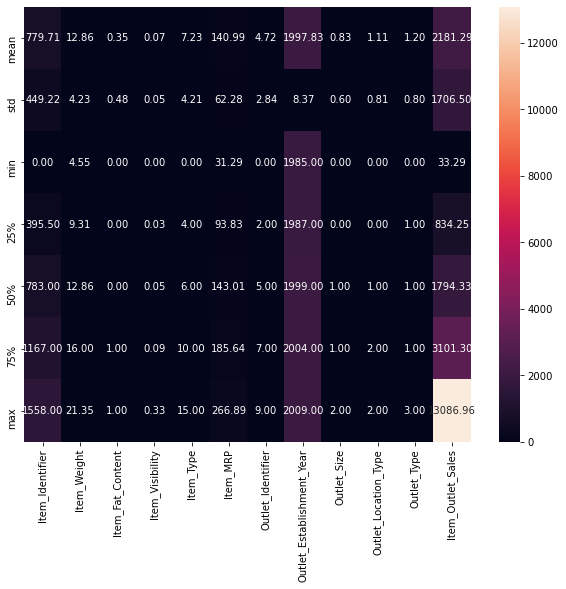

In [70]:
plt.figure(figsize=[10,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

Observations:

1. The mean of the columns ['Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales'] in train data is higher than the median(50%). That means skewness is present in the distribution of data in these columns. We can ignore the categorical data['Item_Fat_Content','Item_Type','Outlet_Location_Type'.'Outlet_Type'] since it's skewness is irrelevant.

2. The 75% and the max value in train data is not having much difference for the columns. So extreme outliers may not be present in these data.


#### PairPlot

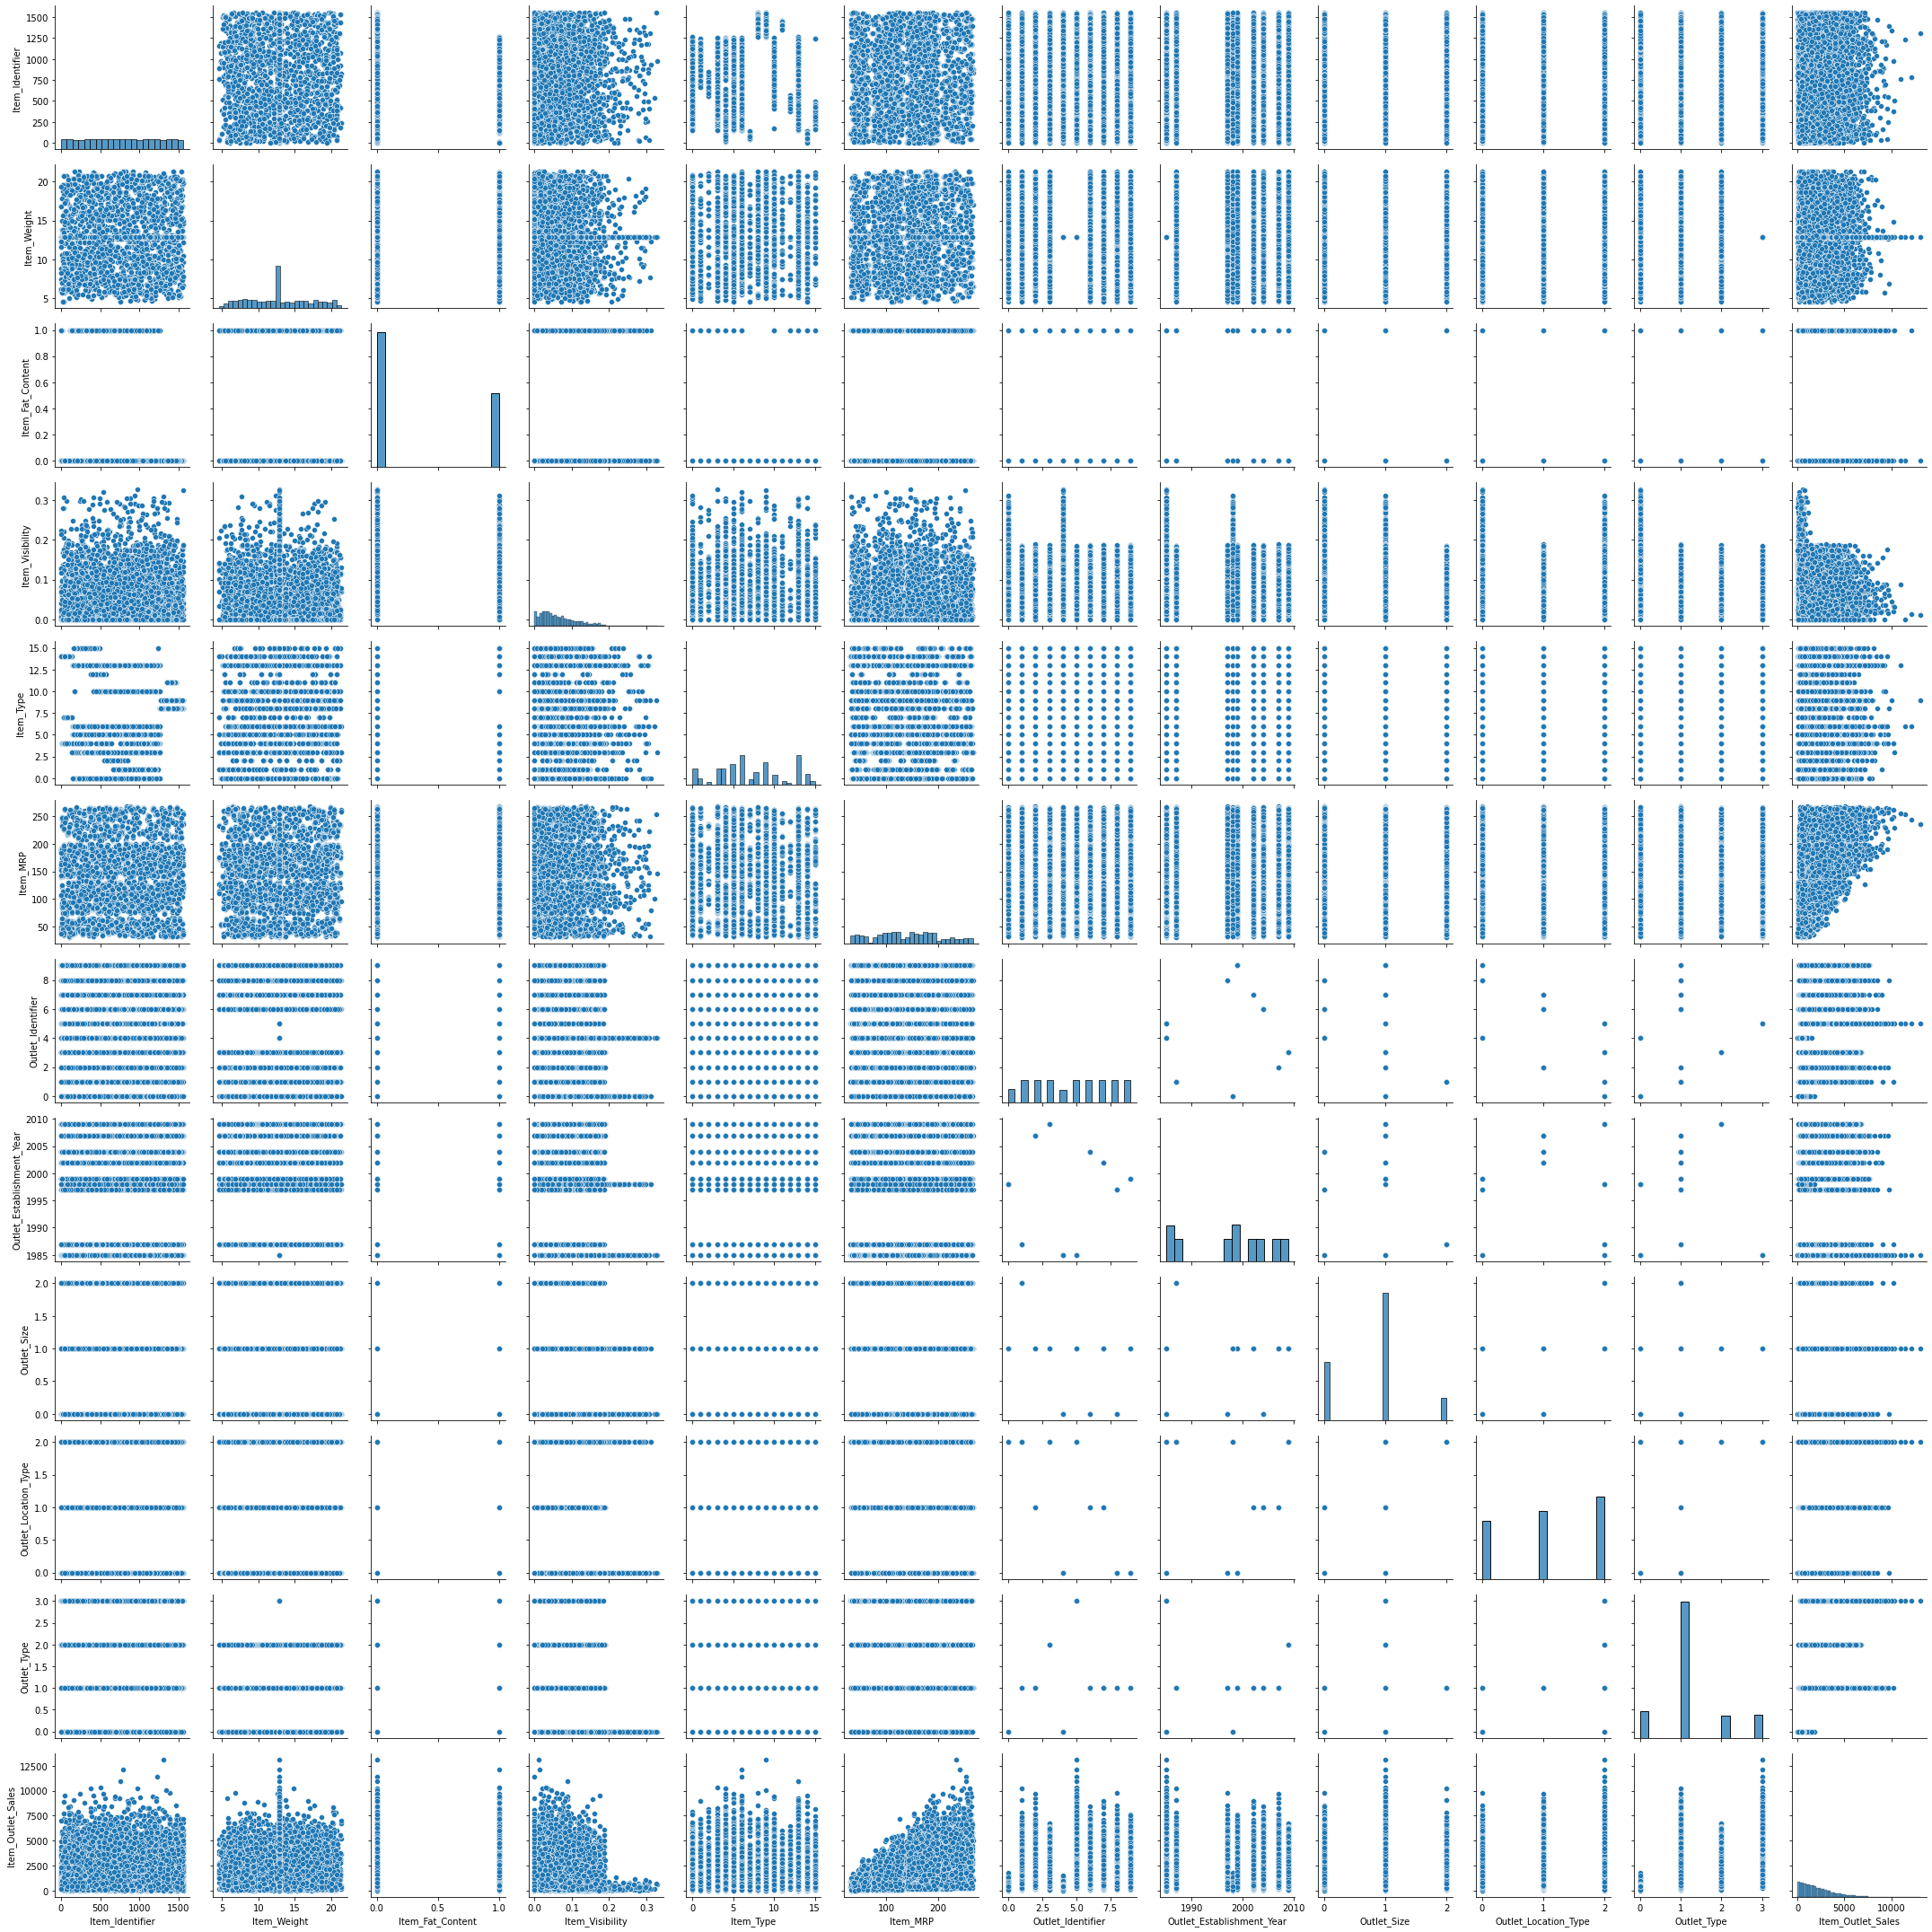

In [71]:
sns.pairplot(data)
plt.tight_layout()

We have plotted the relationship of every columns in train dataset as pairs to identify the variable relationships.

### Correlation

In [72]:
Correlation = data.corr()
Correlation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,-0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.001389,0.007225,0.000622,-0.069309,0.001859,-0.006059,-0.504603,-0.193389,1.000000,0.614311,0.201483,0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

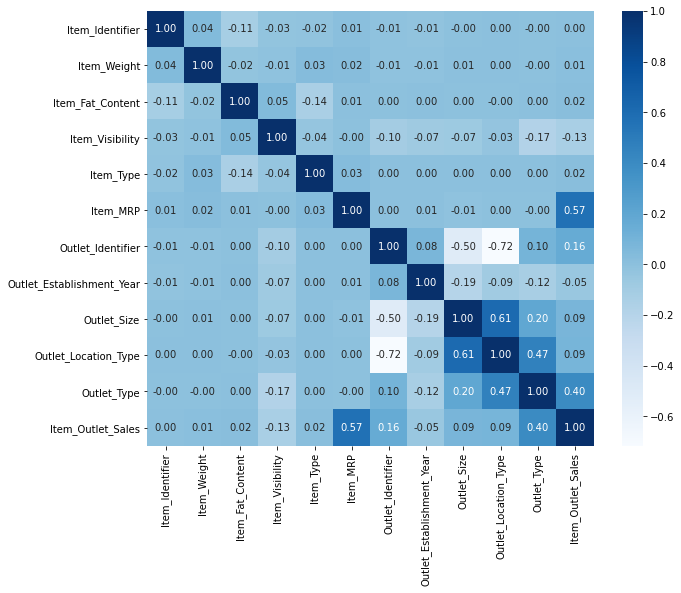

In [73]:
#Plotting the correlation of columns
plt.figure(figsize=[10,8])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='Blues')

#### Correlation with Target Variable

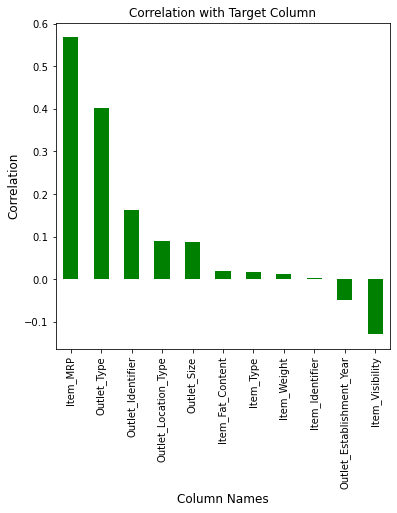

In [74]:
plt.figure(figsize = [6,6])
Correlation['Item_Outlet_Sales'].sort_values(ascending= False).drop('Item_Outlet_Sales').plot(kind = 'bar', color ='g')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
1. The columns ['Item_Visibility','Outlet_Establishment_Year'] is having a negative correlation to the Target variable.
2. The column 'Item MRP' is having the highest correlation to the Target variable(57%). 
3. The column 'Item_Identifier' is having the lowest correlation to the Target variable(0.0%).
4. The columns ['Item_MRP','Outlet_Type'] are highly correlated to the target variable showing a strong bond with the Item Outlet sale.
5. The columns ['Outlet_Identifier','Outlet_Location_Type,'Outlet_Size'] are positively correlated to the Target variable and are having a good bond with the item outlet sale.
6. The columns ['Item_Fat_Content','Item_Type','Item_Weight','Item_Identifier'] are having less correlation with the Target variable.

### Distribution of data in columns

In [75]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Skewness is only considered for continuous data. So we can group the columns containing continuous data.

In [76]:
cols = data[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].copy()

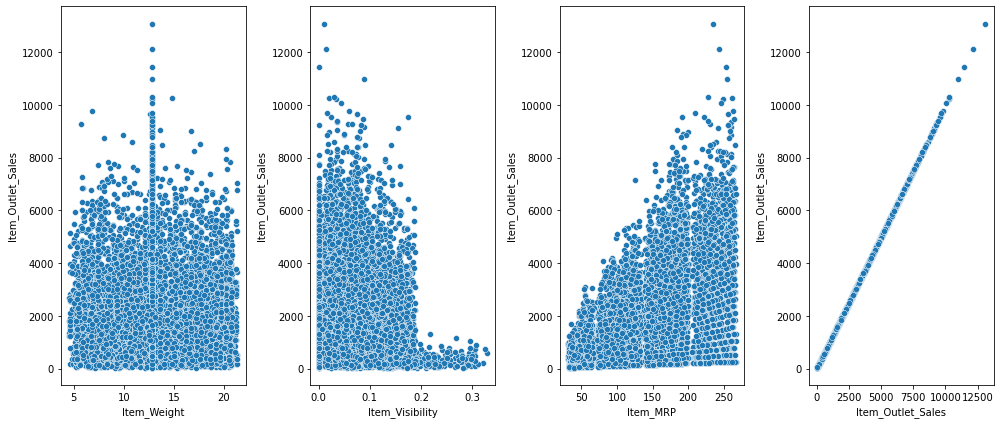

In [77]:
#Bivariante analysis
#Plotting the columns with continuous data with respect to its relation to target column
plt.figure(figsize = [14,6])
for i in range(0,len(cols.columns.values)):
    plt.subplot(1,4,i+1)
    sns.scatterplot(cols[cols.columns.values[i]],cols['Item_Outlet_Sales'])
    plt.tight_layout()

From the above observations, except the column 'Item Visibility', all other columns are having a positive relation with the target variable.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

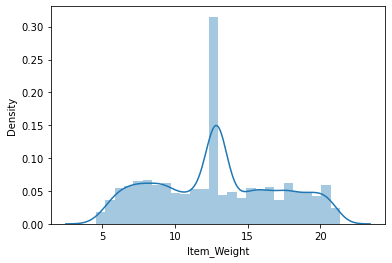

In [78]:
sns.distplot(cols['Item_Weight'])

From the above observation the data is not normally distributed and there is skewness present in the distribution of data.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

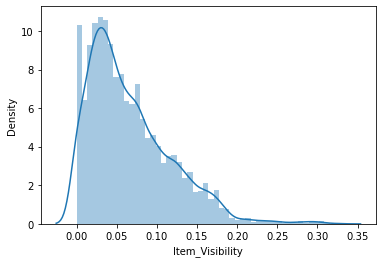

In [79]:
sns.distplot(cols['Item_Visibility'])

From the above observations the data in column 'Item_Visibility' is not normally distributed and a large amount of skewness present in the data.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

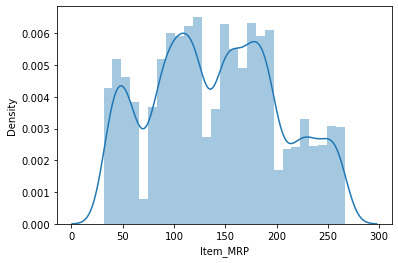

In [80]:
sns.distplot(cols['Item_MRP'])

From the above observations, the data in column 'Item_MRP' is not normally distributed and a small amount of skewness is present in the data.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

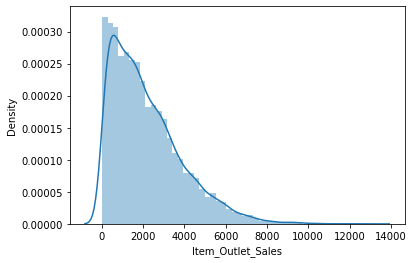

In [81]:
sns.distplot(cols['Item_Outlet_Sales'])

The data is not normally distributed in column 'Item_Outlet_Sale' and large amount of skewness present in the data.

#### Plotting the distribution of all the columns

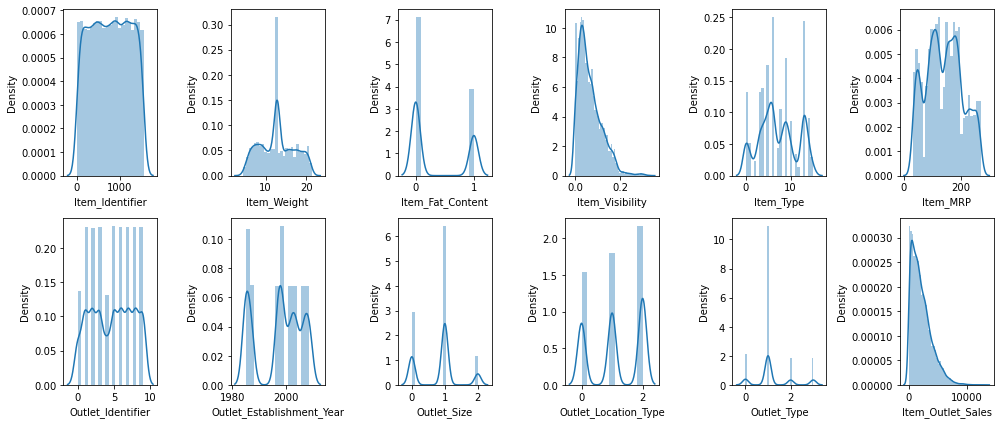

In [82]:
plt.figure(figsize = [14,6])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,6,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

In [83]:
Skewness = cols.skew()
Skewness

Item_Weight          0.090561
Item_Visibility      1.167091
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
dtype: float64

The columns ['Item_Visibility' and 'Item_Outlet_Sales'] are having high skewness. The column 'Item_Outlet_Sales' is the target variable.

### Checking the presence of outliers

In [84]:
#User defined function to plot the outlers of each columns using boxplot
def box(col):
    plt.figure(figsize =[3,6])
    sns.boxplot(y = data[col])
    plt.show()

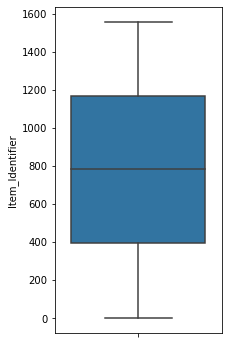

In [85]:
box('Item_Identifier')

There is no outliers present in the column 'Item Identifier'

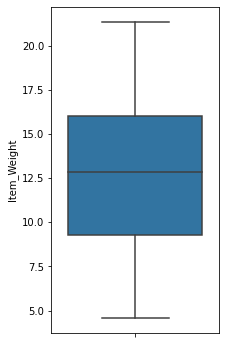

In [86]:
box('Item_Weight')

There is no outliers present in the data of column 'Item_Weight'.

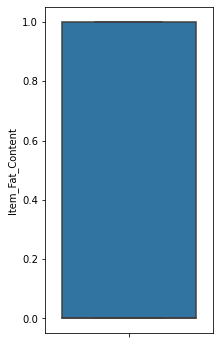

In [87]:
box('Item_Fat_Content')

This column is having binary data and there is not outliers.

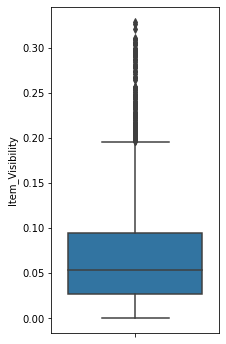

In [88]:
box('Item_Visibility')

Outliers are present in the data of column 'Item_Visibility'.

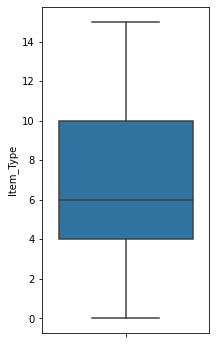

In [89]:
box('Item_Type')

In the column 'Item_Type', there are no outlier data.

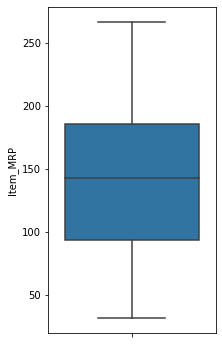

In [90]:
box('Item_MRP')

The column 'Item_MRP' is also not having any outlier data.

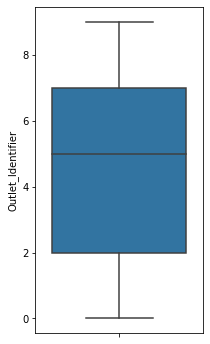

In [91]:
box('Outlet_Identifier')

The column 'Outlet_Identifier' is not having any outlier data.

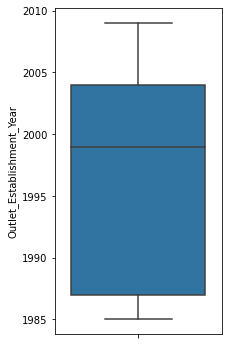

In [92]:
box('Outlet_Establishment_Year')

The column 'Outlet_Establishment_Year' is not having any outlier data.

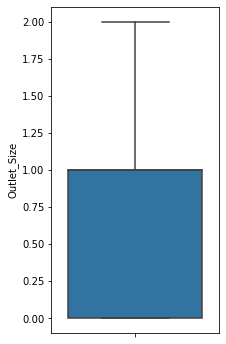

In [93]:
box('Outlet_Size')

The column 'Outlet_Size is not having any outlier data.

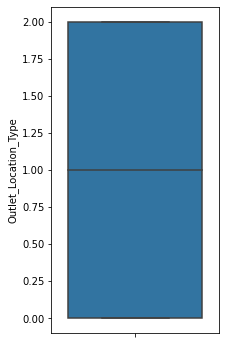

In [94]:
box('Outlet_Location_Type')

The column 'Outlet_Location_Type is not having any outlier data.

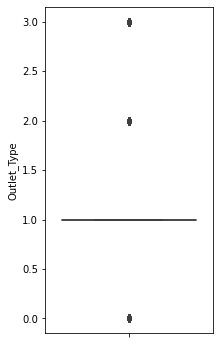

In [95]:
box('Outlet_Type')

The column 'Outlet_Type' is having some outlier data

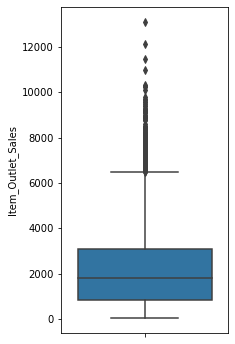

In [96]:
box('Item_Outlet_Sales')

The target column 'Item_Outlet_Sales is having some outlier data.

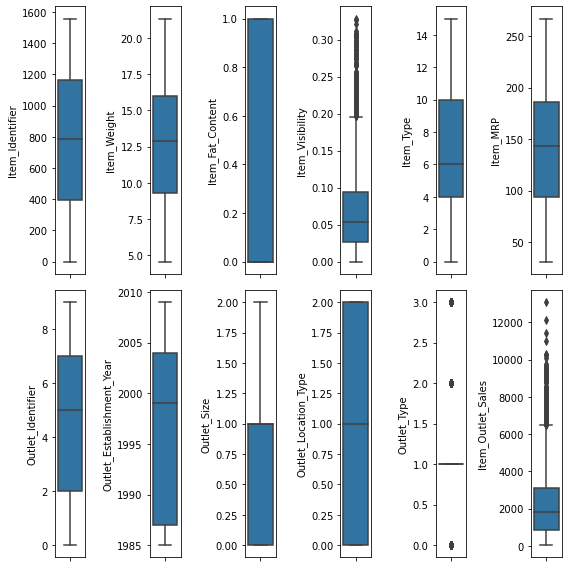

In [97]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [8,8])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, three columns are having outlier data.

### Splitting the data before removing skewness

In [98]:
#train data
x = data.drop(['Item_Outlet_Sales'],axis = 1)
y = data['Item_Outlet_Sales']

In [99]:
print(x.shape)
print(y.shape)

(8523, 11)
(8523,)


In [100]:
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Item_Visibility     1.167091
Outlet_Type         0.927438
Item_Fat_Content    0.616705
dtype: float64

Here the columns ['Outlet_Type','Item_Fat_Content'] are having categorical data for which the skewness is irrelevant. We can now remove the skewness in column Item_Visibility.

In [101]:
from sklearn.preprocessing import power_transform
x['Item_Visibility'] = power_transform(x['Item_Visibility'].values.reshape(-1,1))

In [102]:
x.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              0.124279
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

The skewness have been removed for the column 'Item Visibility'.

In [103]:
#test data
x1 = test_data.copy()
print(x1.shape)

(5681, 11)


In [104]:
x1.skew().sort_values(ascending=False)[np.abs(x1.skew())>0.5]

Item_Visibility     1.238312
Outlet_Type         0.927446
Item_Fat_Content    0.609223
dtype: float64

Here the columns ['Outlet_Type','Item_Fat_Content'] are having categorical data for which the skewness is irrelevant. We can now remove the skewness in column Item_Visibility.

In [105]:
x1['Item_Visibility'] = power_transform(x1['Item_Visibility'].values.reshape(-1,1))

In [106]:
x1.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              0.116776
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                  0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

The skewness have been removed for the column 'Item Visibility'.

### Removing the Outliers

In [107]:
#Train data
from scipy.stats import zscore
df = x.copy()
df['Item_Outlet_Sales'] = y.copy()
z = np.abs(zscore(df))
z

array([[1.38851383, 0.84187169, 0.73814723, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.64170589, 1.35474328, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.09855449, 0.73814723, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.53424315, 0.73814723, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.33644372, 1.35474328, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.45963367, 0.73814723, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [108]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,-1.146886,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,-1.037100,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,-1.122375,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,-1.745551,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,-1.745551,9.0,53.8614,1.0,1987,2.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.020310,13.0,214.5218,1.0,1987,2.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,-0.221388,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,-0.542979,8.0,85.1224,6.0,2004,0.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,1.459990,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [109]:
df.shape

(8523, 12)

In [110]:
df_new.shape

(8433, 12)

In [111]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

1.0559662090813093

We are losing only 1.06% of the total train data after removing outliers.

In [112]:
#test data
df_test = x1.copy()
z1 = np.abs(zscore(df_test))
z1

array([[0.73989552, 1.89745979, 0.74081066, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [0.65908503, 1.03552991, 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [1.42005049, 0.44863355, 0.74081066, ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [1.43351891, 0.63504136, 0.74081066, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.57551969, 0.6135406 , 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.47950616, 0.75283211, 1.34987258, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [113]:
threshold = 3
df_new_test = df_test[(z1<3).all(axis=1)]
df_new_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0.0,-1.462069,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,1.0,-0.448019,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,0.0,0.871342,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,0.0,-1.175927,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,1.0,1.153823,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1.0,-1.243150,13.0,141.3154,8.0,1997,0.0,0.0,1.0
5677,306.0,7.600000,1.0,1.453584,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,0.0,0.397868,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,1.0,-1.760234,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [114]:
df_test.shape

(5681, 11)

In [115]:
df_new_test.shape

(5681, 11)

We are not losing any data since there is no outliers in the test data.

### Checking the Multicolinearity of variables in the dataframe

In [116]:
#train data
x = df_new.drop('Item_Outlet_Sales',axis = 1)
y = df_new['Item_Outlet_Sales']

print(x.shape)
print(y.shape)

(8433, 11)
(8433,)


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#User defined function to calculate variance of inflation in trian data.
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [118]:
calc_vif(x)

,Column Name,VIF Factor
0,Item_Identifier,4.077904
1,Item_Weight,10.228844
2,Item_Fat_Content,1.600638
3,Item_Visibility,1.034018
4,Item_Type,4.038239
5,Item_MRP,6.138136
6,Outlet_Identifier,15.427328
7,Outlet_Establishment_Year,44.689503
8,Outlet_Size,4.739469
9,Outlet_Location_Type,16.368079


Since the column 'Outlet_Establishment_Year' is showing high variance of inflation, we can drop the column and calculate the vif again.

In [119]:
x_new = x.drop(['Outlet_Establishment_Year'],axis = 1)
calc_vif(x_new)

,Column Name,VIF Factor
0,Item_Identifier,3.785729
1,Item_Weight,8.303076
2,Item_Fat_Content,1.549158
3,Item_Visibility,1.027518
4,Item_Type,3.768014
5,Item_MRP,5.540728
6,Outlet_Identifier,8.651968
7,Outlet_Size,4.633374
8,Outlet_Location_Type,11.569387
9,Outlet_Type,7.380823


Now the vif have been reduced and we can proceed with further steps for the train data.

In [120]:
#test data
x1 = df_new_test
print(x1.shape)

(5681, 11)


In [121]:
#User defined function to calculate variance of inflation in trian data.
def calc_vif(x1):
    vif = pd.DataFrame()
    vif['Column Name'] = x1.columns
    vif['VIF Factor'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [122]:
calc_vif(x1)

,Column Name,VIF Factor
0,Item_Identifier,4.089088
1,Item_Weight,10.017426
2,Item_Fat_Content,1.610975
3,Item_Visibility,1.034672
4,Item_Type,4.067337
5,Item_MRP,6.243622
6,Outlet_Identifier,15.496707
7,Outlet_Establishment_Year,44.226985
8,Outlet_Size,4.773046
9,Outlet_Location_Type,16.582608


Here also the column 'Outlet_Establishment_Year' is showing high variance of inflation, so we can drop that column and calculate the vif again.

In [123]:
x1_new = x1.drop(['Outlet_Establishment_Year'],axis = 1)
calc_vif(x1_new)

,Column Name,VIF Factor
0,Item_Identifier,3.811555
1,Item_Weight,8.277441
2,Item_Fat_Content,1.550556
3,Item_Visibility,1.025578
4,Item_Type,3.792290
5,Item_MRP,5.623282
6,Outlet_Identifier,8.655319
7,Outlet_Size,4.664697
8,Outlet_Location_Type,11.618825
9,Outlet_Type,7.395897


Now the vif have been reduced and we can proceed with further steps for the test data.

### End of EDA

### Machine learning modeling

Splitting the data into features and target

In [124]:
features = x_new.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(8433, 10)
(8433,)


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split


In [126]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)

#### Finding the best random_state

In [127]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [128]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [129]:
best_ran(lr)

LinearRegression()
At random state  71 the model is having r2 score of  0.5315642685695987


In [130]:
mod_test(lr,71)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.5315642685695987
__________________________________________________
Mean Sqaured Error is  1231996.3027399268
__________________________________________________
Mean Absolute Error is  845.5979359569224
__________________________________________________
Coefficent is  [-8.61046183e-03  1.34491592e+00  5.33060090e+01 -6.01865693e+01
 -2.84399749e+00  1.45247226e+01  7.07498726e+01  3.71321875e+02
 -1.98517190e+02  7.83386102e+02]
__________________________________________________
Intercept is  -1292.2269179754207
__________________________________________________


#### KNeighborsRegressor

In [131]:
best_ran(knn)

KNeighborsRegressor()
At random state  85 the model is having r2 score of  0.22256484012300548


In [132]:
mod_test(knn,85)

KNeighborsRegressor()
R2 score is  0.22256484012300548
__________________________________________________
Mean Sqaured Error is  1948622.7549807243
__________________________________________________
Mean Absolute Error is  1052.773300225252
__________________________________________________


#### SVR

In [133]:
best_ran(svr)

SVR()
At random state  0 the model is having r2 score of  0


In [134]:
mod_test(svr,0)

SVR()
R2 score is  -0.022339765963820923
__________________________________________________
Mean Sqaured Error is  2533176.004192955
__________________________________________________
Mean Absolute Error is  1247.2019630106618
__________________________________________________


#### DecisionTreeRegressor

In [135]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  49 the model is having r2 score of  0.24306637891610672


In [136]:
mod_test(dtr,49)

DecisionTreeRegressor()
R2 score is  0.24792122339429146
__________________________________________________
Mean Sqaured Error is  2030813.2282290377
__________________________________________________
Mean Absolute Error is  1012.2208311796088
__________________________________________________


#### RandomForestRegressor

In [137]:
best_ran(rfr)

RandomForestRegressor()
At random state  86 the model is having r2 score of  0.5793430902672874


In [138]:
mod_test(rfr,86)

RandomForestRegressor()
R2 score is  0.5718670709549707
__________________________________________________
Mean Sqaured Error is  1033337.9732567945
__________________________________________________
Mean Absolute Error is  715.4890920782454
__________________________________________________


#### AdaBoostRegressor

In [139]:
best_ran(abr)

AdaBoostRegressor()
At random state  49 the model is having r2 score of  0.5922219930519614


In [140]:
mod_test(abr,86)

AdaBoostRegressor()
R2 score is  0.5991268675234913
__________________________________________________
Mean Sqaured Error is  967543.9615690248
__________________________________________________
Mean Absolute Error is  724.0164718303888
__________________________________________________


#### GradientBoostingRegressor

In [141]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  86 the model is having r2 score of  0.6220705085267759


In [142]:
mod_test(gbr,86)

GradientBoostingRegressor()
R2 score is  0.6219778240115248
__________________________________________________
Mean Sqaured Error is  912391.0885653221
__________________________________________________
Mean Absolute Error is  685.2929516197393
__________________________________________________


#### VotingRegressor

In [143]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  86 the model is having r2 score of  0.5114375092900059


In [144]:
mod_test(vtr,86)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.5059155181028556
__________________________________________________
Mean Sqaured Error is  1192518.0767572545
__________________________________________________
Mean Absolute Error is  826.9846580559841
__________________________________________________


From the above algorithms, the ensemble methods are performing good and providing better R2 Score. Out of that, the Gradient Boosting Regressor have provided R2 Score of 62%.(Accuracy). 

### Cross Validation

In [145]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [146]:
cross_val(lr,71)

LinearRegression()
At cv fold 7  the cv score is  0.5004025355297549 and the R2 score  is  0.5315642685695987


#### KNeighborsRegressor

In [147]:
cross_val(knn,85)

KNeighborsRegressor()
At cv fold 3  the cv score is  0.19222947163833637 and the R2 score  is  0.22256484012300548


#### SVR

In [148]:
cross_val(svr,0)

SVR()
At cv fold 0  the cv score is  0 and the R2 score  is  -0.022339765963820923


#### DecisionTreeRegressor

In [149]:
cross_val(dtr,49)

DecisionTreeRegressor()
At cv fold 9  the cv score is  0.16192546015061485 and the R2 score  is  0.24887899637126198


#### RandomForestRegressor

In [150]:
cross_val(rfr,86)

RandomForestRegressor()
At cv fold 7  the cv score is  0.543643935637843 and the R2 score  is  0.5778622190735307


#### AdaBoostRegressor

In [151]:
cross_val(abr,86)

AdaBoostRegressor()
At cv fold 7  the cv score is  0.5640910195769404 and the R2 score  is  0.5857597253485203


#### GradientBoostingRegressor

In [152]:
cross_val(gbr,86)

GradientBoostingRegressor()
At cv fold 7  the cv score is  0.5922666329827261 and the R2 score  is  0.6219498039502107


#### VotingRegressor

In [153]:
cross_val(vtr,86)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 3  the cv score is  0.48277896980996404 and the R2 score  is  0.5097805304283503


#### After cross validation, the Gradient Boosting Regressor is peforming well with cross validation, with a cross validation mean score of 59% at 7 cross validations with R2 Score of 62%. Since the Gradient Boosting Regressor is performing well, we can consider it as the best model.

In [154]:
gbr = GradientBoostingRegressor()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 86)
gbr.fit(features_train, target_train)
pred_test = gbr.predict(features_test)

cv_score = cross_val_score(gbr,features, target, cv = 7)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

At cv fold 7  the cv score is  0.5922431128449314 and the R2 score  is  0.6218144654579347


### Regularization

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

#### Lasso(L1)

In [156]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [157]:
ls = Lasso(alpha = 0.1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5229889582541106

In [158]:
cross_val(ls,0)

Lasso(alpha=0.1, random_state=0)
At cv fold 7  the cv score is  0.5004037534026461 and the R2 score  is  0.4886418131720188


#### Ridge(L2)

In [159]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [160]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.5229905948145435

In [161]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 7  the cv score is  0.5004031964764323 and the R2 score  is  0.4886453363534208


#### ElasticNet

In [162]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [163]:
en = ElasticNet(alpha = 0.001, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.5229618878054867

In [164]:
cross_val(en,0)

ElasticNet(alpha=0.001, random_state=0)
At cv fold 7  the cv score is  0.5004045482136553 and the R2 score  is  0.48867710840501455


#### The regularization techniques didn't provide much better results. So we can stick to the GradientBoosting Regressor(grb) model since it is performing well with all the tests.

### Hyper Parameter Tuning

In [167]:
parameters = {'loss':['squared_error', 'absolute_error'],
             'learning_rate':[0.1,0.3],
             'n_estimators' : [100],
             'criterion':['friedman_mse', 'squared_error','mae']}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=parameters,cv = 7)

In [168]:
grid.fit(features,target)
grid.best_score_

0.5923807625393032

In [169]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'n_estimators': 100}

In [171]:
gbr = GradientBoostingRegressor(criterion = 'squared_error',learning_rate= 0.1,loss= 'squared_error',n_estimators=100)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 86)
gbr.fit(features_train, target_train)
pred_test = gbr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test))
print('Mean Squared Error',mean_squared_error(target_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test))

R2 Score 0.6223825542946507
Mean Squared Error 911414.2350179582
Mean Absolute Error 685.0705630824528


#### After the hyperparameter tuning, the model is providing slightly much better result and Mean squared error and mean absolute error have been slighlty reduced.

### After all the tests and tunings, our model gbr() is performing good with  R2 Score of 62.2% with a mean squared error of 911414.2 and mean absolute error of 685.07 with GradientBoostingRegressor Algorithm.

### Predicting the target for test data

In [173]:
#Predicting the outlet sales with the test data
output = gbr.predict(x1_new)   #x1_new is the test data which was cleansed for testing purpose.
output

array([1649.36796107, 1384.95224922,  615.69470068, ..., 1836.72227441,
       3686.29112663, 1278.86291623])

In [174]:
test_data_new = x1_new.copy()
test_data_new['Item_Outlet_Sales'] = output

In [175]:
test_data_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103.0,20.750000,0.0,-1.462069,13.0,107.8622,9.0,1.0,0.0,1.0,1649.367961
1,1067.0,8.300000,1.0,-0.448019,4.0,87.3198,2.0,1.0,1.0,1.0,1384.952249
2,1406.0,14.600000,0.0,0.871342,11.0,241.7538,0.0,1.0,2.0,0.0,615.694701
3,809.0,7.315000,0.0,-1.175927,13.0,155.0340,2.0,1.0,1.0,1.0,2461.467282
4,1184.0,12.695633,1.0,1.153823,4.0,234.2300,5.0,1.0,2.0,3.0,5168.600355
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1.0,-1.243150,13.0,141.3154,8.0,0.0,0.0,1.0,2160.841440
5677,306.0,7.600000,1.0,1.453584,15.0,169.1448,3.0,1.0,2.0,2.0,2572.932597
5678,1412.0,10.000000,0.0,0.397868,8.0,118.7440,7.0,1.0,1.0,1.0,1836.722274
5679,517.0,15.300000,1.0,-1.760234,3.0,214.6218,2.0,1.0,1.0,1.0,3686.291127


### Saving the predicted result with test data

In [176]:
test_data_new.to_csv('BigMart sales prediction with test data.csv')

### Saving the Best Model

### Conclusion

In [172]:
import pickle
filename = 'Bigmart store-product sale predictive model.pkl'
pickle.dump(gbr,open(filename,'wb'))

In [179]:
original = np.array(target_test)
predicted = np.round(np.array(gbr.predict(features_test)),0)

prediction_test = pd.DataFrame({'Original Value':original,'Predicted Value':predicted})
prediction_test.sample(20)

,Original Value,Predicted Value
1248,162.4552,225.0
641,6478.2340,4578.0
465,284.2966,640.0
1635,699.0900,744.0
326,2888.2404,4024.0
96,1691.7978,2438.0
147,5070.7328,2916.0
1359,1935.4806,3468.0
1121,972.0680,830.0
492,1137.1864,1324.0


### Our model is performing well with the predictions and providing almost similar output as the original data with R2 Score of 62.2%.

### Using this model, BigMart can try to understand the properties of products and stores which play a key role in increasing the sales of their products.

## Predictive Model Created Successfully